In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path 
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

In [4]:
train_path = list(Path('C:/Users/fadel/Documents/Capstone/Dataset/train').glob(r'**/*jpg'))
test_path = list(Path('C:/Users/fadel/Documents/Capstone/Dataset/test').glob(r'**/*jpg'))
val_path = list(Path('C:/Users/fadel/Documents/Capstone/Dataset/validation').glob(r'**/*jpg'))

In [5]:
train_path[0:5], test_path[0:5], val_path[0:5]

([WindowsPath('C:/Users/fadel/Documents/Capstone/Dataset/train/apple/Image_1.jpg'),
  WindowsPath('C:/Users/fadel/Documents/Capstone/Dataset/train/apple/Image_10.jpg'),
  WindowsPath('C:/Users/fadel/Documents/Capstone/Dataset/train/apple/Image_16.jpg'),
  WindowsPath('C:/Users/fadel/Documents/Capstone/Dataset/train/apple/Image_17.jpg'),
  WindowsPath('C:/Users/fadel/Documents/Capstone/Dataset/train/apple/Image_18.jpg')],
 [WindowsPath('C:/Users/fadel/Documents/Capstone/Dataset/test/apple/Image_1.jpg'),
  WindowsPath('C:/Users/fadel/Documents/Capstone/Dataset/test/apple/Image_10.jpg'),
  WindowsPath('C:/Users/fadel/Documents/Capstone/Dataset/test/apple/Image_2.jpg'),
  WindowsPath('C:/Users/fadel/Documents/Capstone/Dataset/test/apple/Image_3.jpg'),
  WindowsPath('C:/Users/fadel/Documents/Capstone/Dataset/test/apple/Image_4.jpg')],
 [WindowsPath('C:/Users/fadel/Documents/Capstone/Dataset/validation/apple/Image_1.jpg'),
  WindowsPath('C:/Users/fadel/Documents/Capstone/Dataset/validation/a

In [6]:
def create_df_labels(path):
    labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1], path))
    df = pd.DataFrame({
    'image':path,
    'label':labels
    })
    df['image'] = df['image'].astype(str)
    return df

In [7]:
df_train = create_df_labels(train_path)
df_test= create_df_labels(test_path)
df_val= create_df_labels(val_path)

In [8]:
df_train

,image,label
0,C:\Users\fadel\Documents\Capstone\Dataset\trai...,apple
1,C:\Users\fadel\Documents\Capstone\Dataset\trai...,apple
2,C:\Users\fadel\Documents\Capstone\Dataset\trai...,apple
3,C:\Users\fadel\Documents\Capstone\Dataset\trai...,apple
4,C:\Users\fadel\Documents\Capstone\Dataset\trai...,apple
...,...,...
2850,C:\Users\fadel\Documents\Capstone\Dataset\trai...,watermelon
2851,C:\Users\fadel\Documents\Capstone\Dataset\trai...,watermelon
2852,C:\Users\fadel\Documents\Capstone\Dataset\trai...,watermelon
2853,C:\Users\fadel\Documents\Capstone\Dataset\trai...,watermelon


In [9]:
df_test

,image,label
0,C:\Users\fadel\Documents\Capstone\Dataset\test...,apple
1,C:\Users\fadel\Documents\Capstone\Dataset\test...,apple
2,C:\Users\fadel\Documents\Capstone\Dataset\test...,apple
3,C:\Users\fadel\Documents\Capstone\Dataset\test...,apple
4,C:\Users\fadel\Documents\Capstone\Dataset\test...,apple
...,...,...
335,C:\Users\fadel\Documents\Capstone\Dataset\test...,watermelon
336,C:\Users\fadel\Documents\Capstone\Dataset\test...,watermelon
337,C:\Users\fadel\Documents\Capstone\Dataset\test...,watermelon
338,C:\Users\fadel\Documents\Capstone\Dataset\test...,watermelon


In [10]:
df_val

,image,label
0,C:\Users\fadel\Documents\Capstone\Dataset\vali...,apple
1,C:\Users\fadel\Documents\Capstone\Dataset\vali...,apple
2,C:\Users\fadel\Documents\Capstone\Dataset\vali...,apple
3,C:\Users\fadel\Documents\Capstone\Dataset\vali...,apple
4,C:\Users\fadel\Documents\Capstone\Dataset\vali...,apple
...,...,...
337,C:\Users\fadel\Documents\Capstone\Dataset\vali...,watermelon
338,C:\Users\fadel\Documents\Capstone\Dataset\vali...,watermelon
339,C:\Users\fadel\Documents\Capstone\Dataset\vali...,watermelon
340,C:\Users\fadel\Documents\Capstone\Dataset\vali...,watermelon


In [11]:
df_train['label'].unique()

array(['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage',
       'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn',
       'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno',
       'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika',
       'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish',
       'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato',
       'turnip', 'watermelon'], dtype=object)

In [12]:
my_label = df_train['label'].unique()
random_img = pd.DataFrame()

for label in my_label:
    group_df = df_train[df_train['label'] == label]
    random_row = group_df.sample(n=1)
    random_img = pd.concat([random_img, random_row])
random_img

,image,label
57,C:\Users\fadel\Documents\Capstone\Dataset\trai...,apple
117,C:\Users\fadel\Documents\Capstone\Dataset\trai...,banana
171,C:\Users\fadel\Documents\Capstone\Dataset\trai...,beetroot
262,C:\Users\fadel\Documents\Capstone\Dataset\trai...,bell pepper
303,C:\Users\fadel\Documents\Capstone\Dataset\trai...,cabbage
399,C:\Users\fadel\Documents\Capstone\Dataset\trai...,capsicum
527,C:\Users\fadel\Documents\Capstone\Dataset\trai...,carrot
585,C:\Users\fadel\Documents\Capstone\Dataset\trai...,cauliflower
686,C:\Users\fadel\Documents\Capstone\Dataset\trai...,chilli pepper
701,C:\Users\fadel\Documents\Capstone\Dataset\trai...,corn


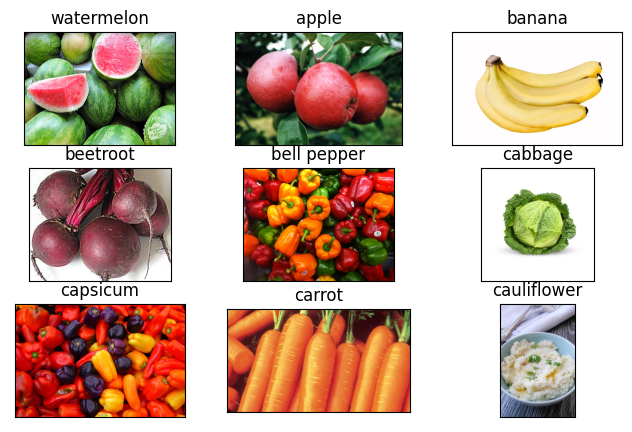

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8,5), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(random_img.iloc[i-1,0]))
    ax.set_title(random_img.iloc[i-1,1])
    
plt.show()

In [14]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [15]:
train_generator = image_datagen.flow_from_dataframe(
    dataframe = df_train,
    target_size = (224,224),
    class_mode = 'categorical',
    x_col = 'image',
    y_col = 'label',
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_generator = image_datagen.flow_from_dataframe(
    dataframe = df_test,
    target_size = (224,224),
    class_mode = 'categorical',
    x_col = 'image',
    y_col = 'label',
    color_mode='rgb',
    batch_size=32,
    shuffle=False,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_generator = image_datagen.flow_from_dataframe(
    dataframe = df_val,
    target_size = (224,224),
    class_mode = 'categorical',
    x_col = 'image',
    y_col = 'label',
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2855 validated image filenames belonging to 36 classes.
Found 340 validated image filenames belonging to 36 classes.
Found 342 validated image filenames belonging to 36 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


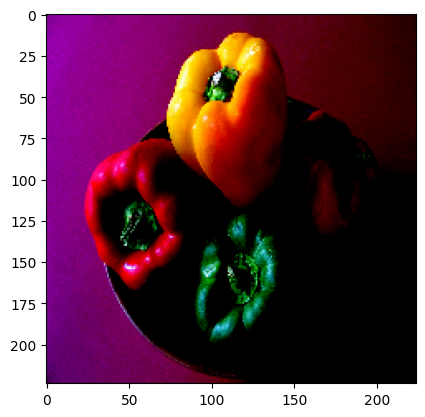

(224, 224, 3)

In [15]:
batch = train_generator.next()
image = batch[0][5]

plt.imshow(image)
plt.show()
image.shape

In [16]:
base_model =  tf.keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    pooling='avg',
) #this is our base model 

base_model.trainable = False # we dont want to train the intial weights so we use .trainable = False 

In [17]:
base_model.summary() 

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [19]:
inputs = base_model.input
x = tf.keras.layers.Dense(64, activation='relu')(base_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x) 
outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs) 
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(                    
    train_generator,
    validation_data=val_generator,
    batch_size = 32,
    epochs=30,
    callbacks=[                  
        tf.keras.callbacks.EarlyStopping(  
            monitor='val_loss',
            patience=2,
            restore_best_weights=True 
        )
    ]
)
    

Epoch 1/30
90/90 [==============================] - 80s 766ms/step - loss: 2.1549 - accuracy: 0.4077 - val_loss: 0.6762 - val_accuracy: 0.8059
Epoch 2/30
90/90 [==============================] - 63s 702ms/step - loss: 0.8703 - accuracy: 0.7268 - val_loss: 0.3789 - val_accuracy: 0.8765
Epoch 3/30
90/90 [==============================] - 61s 675ms/step - loss: 0.5854 - accuracy: 0.8035 - val_loss: 0.3370 - val_accuracy: 0.8882
Epoch 4/30
90/90 [==============================] - 57s 627ms/step - loss: 0.4463 - accuracy: 0.8403 - val_loss: 0.2401 - val_accuracy: 0.9324
Epoch 5/30
90/90 [==============================] - 56s 629ms/step - loss: 0.3223 - accuracy: 0.8872 - val_loss: 0.2221 - val_accuracy: 0.9235
Epoch 6/30
90/90 [==============================] - 55s 615ms/step - loss: 0.2682 - accuracy: 0.9002 - val_loss: 0.2505 - val_accuracy: 0.9294
Epoch 7/30
90/90 [==============================] - 59s 654ms/step - loss: 0.2023 - accuracy: 0.9247 - val_loss: 0.1909 - val_accuracy: 0.9265

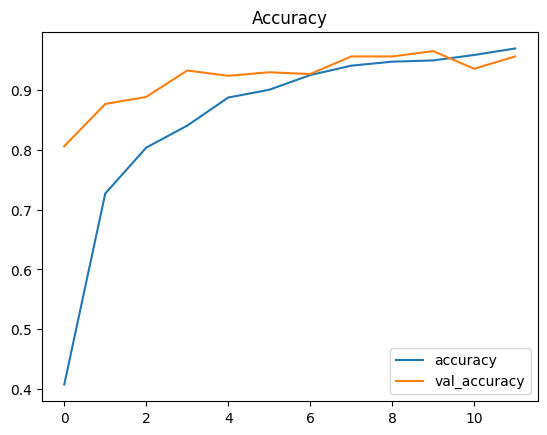

In [21]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()  # we are plotting the train and validation accuracy to check on if its overfitting 
plt.title('Accuracy')
plt.show()

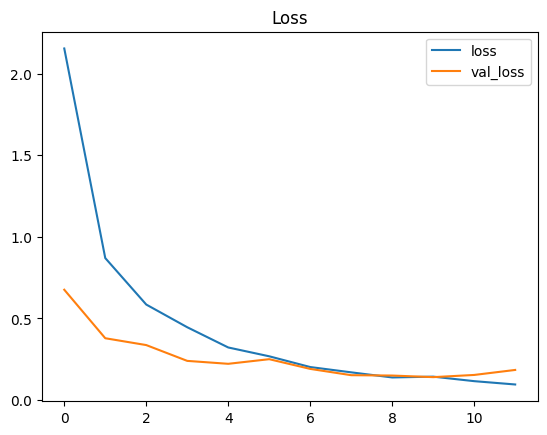

In [22]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Loss')
plt.show()

In [23]:
pred = model.predict(test_generator) #its predicting time , our model will try to predict the prob of the particular class 
pred = np.argmax(pred, axis=1)

11/11 [==============================] - 9s 754ms/step


In [16]:
labels = (train_generator.class_indices) #this gives us the labels with indicies to map

In [17]:
labels

{'apple': 0,
 'banana': 1,
 'beetroot': 2,
 'bell pepper': 3,
 'cabbage': 4,
 'capsicum': 5,
 'carrot': 6,
 'cauliflower': 7,
 'chilli pepper': 8,
 'corn': 9,
 'cucumber': 10,
 'eggplant': 11,
 'garlic': 12,
 'ginger': 13,
 'grapes': 14,
 'jalepeno': 15,
 'kiwi': 16,
 'lemon': 17,
 'lettuce': 18,
 'mango': 19,
 'onion': 20,
 'orange': 21,
 'paprika': 22,
 'pear': 23,
 'peas': 24,
 'pineapple': 25,
 'pomegranate': 26,
 'potato': 27,
 'raddish': 28,
 'soy beans': 29,
 'spinach': 30,
 'sweetcorn': 31,
 'sweetpotato': 32,
 'tomato': 33,
 'turnip': 34,
 'watermelon': 35}

In [26]:
pred

array([ 0,  0,  0,  0, 23, 22,  0,  0,  0,  0,  1,  1,  6,  1,  1,  1,  1,
        1, 17,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  5,
        3,  5,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
        5,  5,  3,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 24, 24, 24

In [27]:
labels = dict((v,k) for k,v in labels.items()) 
pred = [labels[k] for k in pred] #we are iterating over the pred and taking the label for that particualar value

y_test = [labels[k] for k in test_generator.classes]  #we are taking labels for test imag

In [28]:
from sklearn.metrics import accuracy_score # Lets see how well our model is performing 
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 96.47%


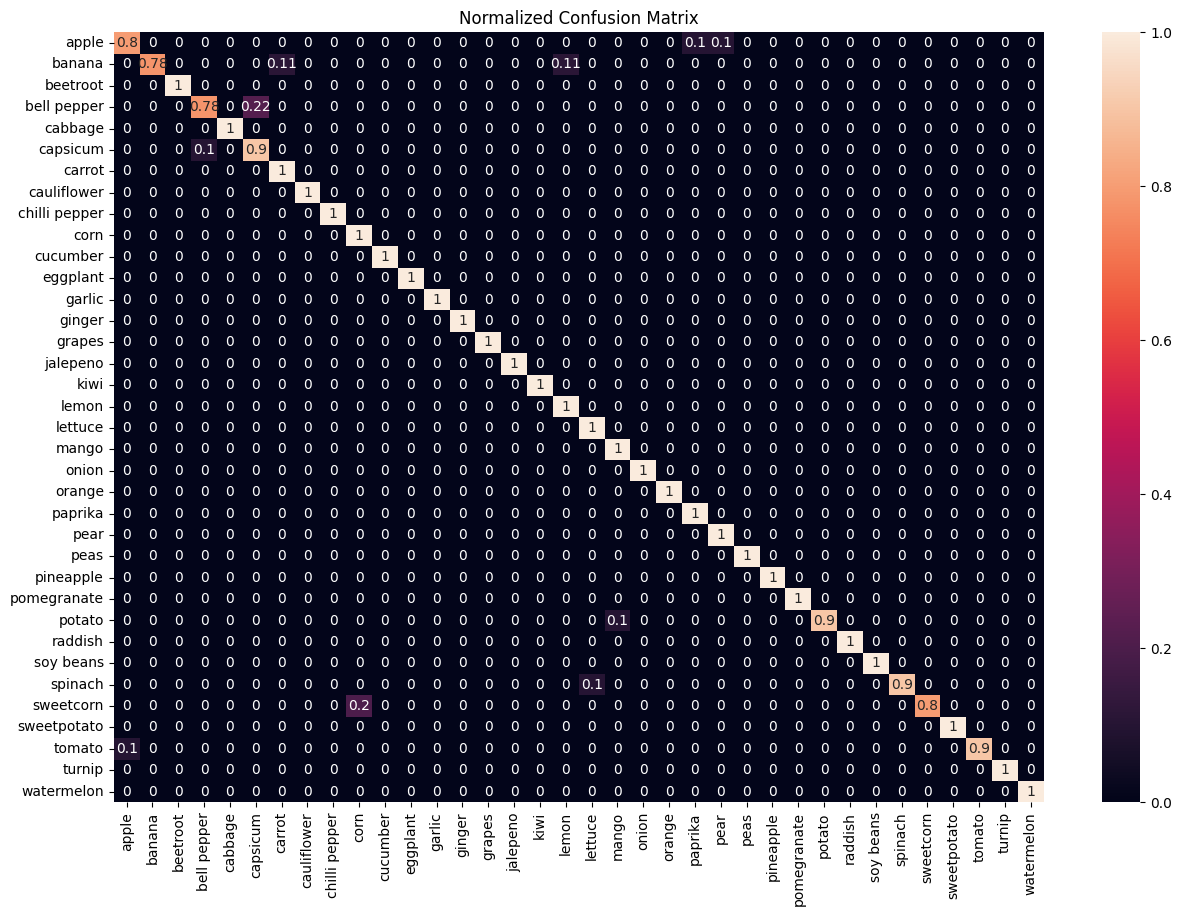

In [29]:
from sklearn.metrics import confusion_matrix #lets visualise the model predictions 
import seaborn as sns
cf_matrix = confusion_matrix(y_test, pred, normalize='true')  
plt.figure(figsize=(15,10))
sns.heatmap(cf_matrix, annot=True,
            xticklabels = sorted(set(y_test)), #we put this to see labels
            yticklabels = sorted(set(y_test))
           )
plt.title('Normalized Confusion Matrix')
plt.show()

In [52]:
model.save(r"C:\Users\fadel\Downloads\models\modelku.h5")

In [60]:
from PIL import Image

# Path ke gambar yang ingin diunggah
image_path = "C:/Users/fadel/Documents/Capstone/Dataset/validation/beetroot/apples-bananas.jpg"

# Baca gambar menggunakan PIL
image = Image.open(image_path)

# Resize gambar ke ukuran yang diharapkan oleh model (misalnya, 224x224)
image = image.resize((224, 224))

# Konversi gambar menjadi array numpy
image_array = np.array(image)

# Normalisasi nilai piksel (opsional, tergantung pada praproses yang diperlukan oleh model Anda)
normalized_image_array = image_array / 255.0

# Ubah dimensi array agar sesuai dengan input model
input_data = np.expand_dims(normalized_image_array, axis=0)

# Set opsi tampilan angka
np.set_printoptions(suppress=True, precision=6)

# Prediksi menggunakan model
predictions = model.predict(input_data)
predictions

1/1 [==============================] - 0s 32ms/step


array([[0.06017 , 0.000543, 0.000001, 0.000013, 0.      , 0.00002 ,
        0.000027, 0.      , 0.000164, 0.      , 0.      , 0.000001,
        0.      , 0.000002, 0.000001, 0.000002, 0.000449, 0.000006,
        0.      , 0.045741, 0.000001, 0.0001  , 0.00001 , 0.889735,
        0.      , 0.000048, 0.000003, 0.000866, 0.000225, 0.      ,
        0.      , 0.      , 0.000682, 0.000425, 0.000529, 0.000239]],
      dtype=float32)

In [3]:
# Path to the saved model directory
model_dir = r"C:\Users\fadel\Downloads\models\modelku.h5"

# Load the saved model
loaded_model = tf.keras.models.load_model(model_dir)

# Print the model summary
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [18]:
labels

{'apple': 0,
 'banana': 1,
 'beetroot': 2,
 'bell pepper': 3,
 'cabbage': 4,
 'capsicum': 5,
 'carrot': 6,
 'cauliflower': 7,
 'chilli pepper': 8,
 'corn': 9,
 'cucumber': 10,
 'eggplant': 11,
 'garlic': 12,
 'ginger': 13,
 'grapes': 14,
 'jalepeno': 15,
 'kiwi': 16,
 'lemon': 17,
 'lettuce': 18,
 'mango': 19,
 'onion': 20,
 'orange': 21,
 'paprika': 22,
 'pear': 23,
 'peas': 24,
 'pineapple': 25,
 'pomegranate': 26,
 'potato': 27,
 'raddish': 28,
 'soy beans': 29,
 'spinach': 30,
 'sweetcorn': 31,
 'sweetpotato': 32,
 'tomato': 33,
 'turnip': 34,
 'watermelon': 35}

In [22]:
from PIL import Image

image_path = "C:/Users/fadel/Documents/Capstone/Dataset/validation/banana/image_1.jpg"

image = Image.open(image_path)

image = image.resize((224, 224))

image_array = np.array(image)

normalized_image_array = image_array / 255.0

input_data = np.expand_dims(normalized_image_array, axis=0)

np.set_printoptions(suppress=True, precision=6)

predictions = loaded_model.predict(input_data)
pred = np.argmax(predictions, axis=1)
pred

1/1 [==============================] - 0s 32ms/step


array([1], dtype=int64)